In [42]:
!pip install "numpy>=1.16.5,<1.23.0"


In [152]:
# Setup and imports libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [164]:
path = r'C:\Users\ΚΩΝΣΤΑΝΤΙΝΟΣ\Documents\Marketing Analytics\Project_for_AUEB.xlsx'

In [165]:
# Import the data
df = pd.read_excel(path)

df.head()

D:\New Folder\anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Order,IDS,GENDER,AGE GROUP,PROFESSION,REGION,Status,Kids,Height,MAIN CATEGORY: Athletic Shoes,...,Price,Design,Image of the brand,"For multiple sports (running, training, gym etc)",Good material,Recommendation by athletes,Advertising,Availability,Others like it,Habit
0,1,100646,2,6,12,1,1,1,1,1,...,10,0,0,0,0,0,0,0,0,0
1,2,100246,2,4,12,2,1,1,2,1,...,9,1,0,0,0,0,0,0,0,0
2,3,101240,2,3,7,4,1,1,2,1,...,8,1,1,0,0,0,0,0,0,0
3,4,100253,2,4,12,1,4,1,2,1,...,7,1,1,1,0,0,0,0,0,0
4,5,100445,2,3,12,2,6,0,2,1,...,6,1,1,1,1,0,0,0,0,0


In [166]:
df.shape

(1200, 102)

### EDA

In [156]:
#No missing values
df.isna().sum()
print(np.isinf(df).sum())
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()
df.isna().sum()  # Count of NaNs per column


Order                         0
IDS                           0
GENDER                        0
AGE GROUP                     0
PROFESSION                    0
                             ..
Recommendation by athletes    0
Advertising                   0
Availability                  0
Others like it                0
Habit                         0
Length: 102, dtype: int64


Order                         0
IDS                           0
GENDER                        0
AGE GROUP                     0
PROFESSION                    0
                             ..
Recommendation by athletes    0
Advertising                   0
Availability                  0
Others like it                0
Habit                         0
Length: 102, dtype: int64


Let's take a look at people's annual income vs spending score:

## 1.K Means Clustering
Let's start clusting our data!

To do so, we simply load the sklearn.cluster.KMeans object - with our desired number of clusters k = 4

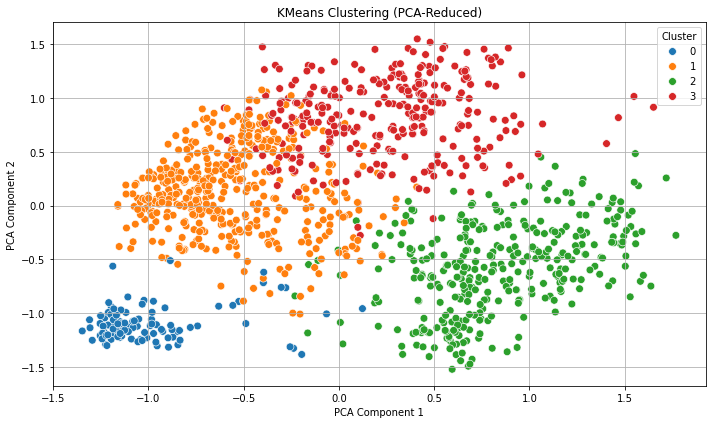

In [185]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Drop non-feature columns
df_cluster = df.drop(columns=["Order", "IDS"], errors="ignore")

# Fill missing values with column means
df_cluster_imputed = df_cluster.fillna(df_cluster.mean(numeric_only=True))

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_cluster_imputed)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original data
df["Cluster"] = clusters

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
plot_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
plot_df["Cluster"] = clusters

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=60)
plt.title("KMeans Clustering (PCA-Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [186]:
# Get feature names (after dropping non-features)
feature_names = df_cluster_imputed.columns

# Get PCA loadings (components)
loadings = pd.DataFrame(pca.components_, columns=feature_names, index=["PCA1", "PCA2"])

# Show top 5 contributors to each component
top_pca1 = loadings.loc["PCA1"].abs().sort_values(ascending=False).head(5)
top_pca2 = loadings.loc["PCA2"].abs().sort_values(ascending=False).head(5)

print("🔍 Top contributors to PCA1:")
print(top_pca1)

print("\n🔍 Top contributors to PCA2:")
print(top_pca2)


🔍 Top contributors to PCA1:
Sub-Category-Shoes 1 (lifestyle)    0.520683
Penetration - Running               0.437014
Sub-Category- Shoes 2 (Running)     0.410337
Sub-Category- Shoes 3 (Tranning)    0.325447
Penetration - Gym                   0.315463
Name: PCA1, dtype: float64

🔍 Top contributors to PCA2:
Penetration - Walking    0.420132
Cluster                  0.365410
Penetration - Gym        0.333095
Agglo_Cluster            0.319888
Penetration - Running    0.315665
Name: PCA2, dtype: float64


 ## 2. Hierarchical Clustering (Agglomerative)  

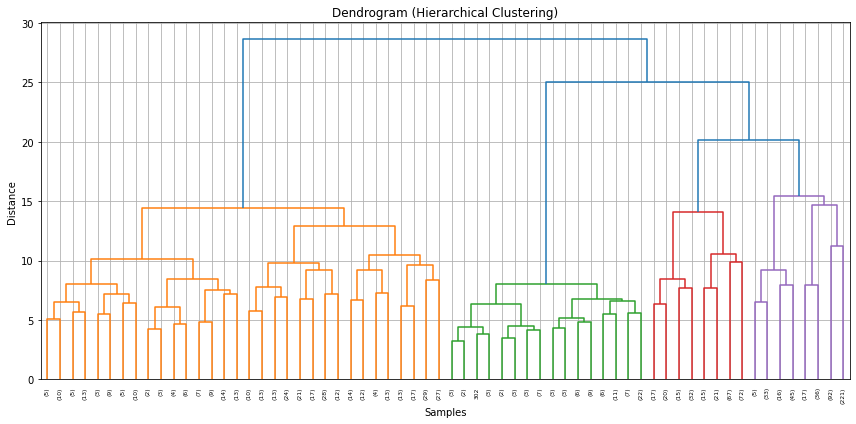

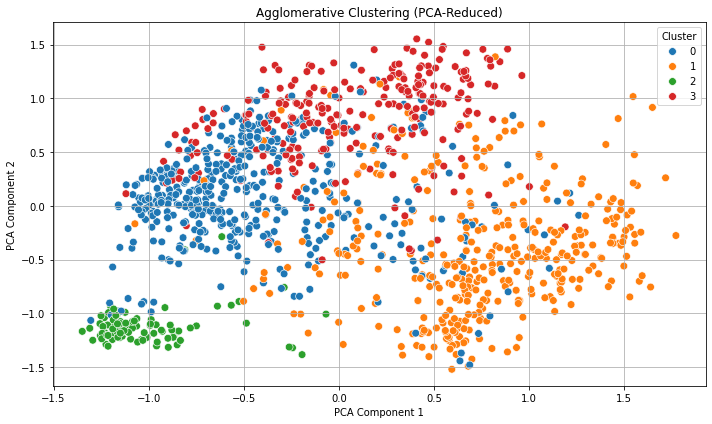

In [187]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 2: Fit Agglomerative Clustering (e.g., 4 clusters) ---
cluster_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters = cluster_model.fit_predict(scaled_data)

# Add clusters to DataFrame
df["Agglo_Cluster"] = clusters

# --- Optional: PCA for visualizing the clusters ---
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=60)
plt.title("Agglomerative Clustering (PCA-Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. GMM

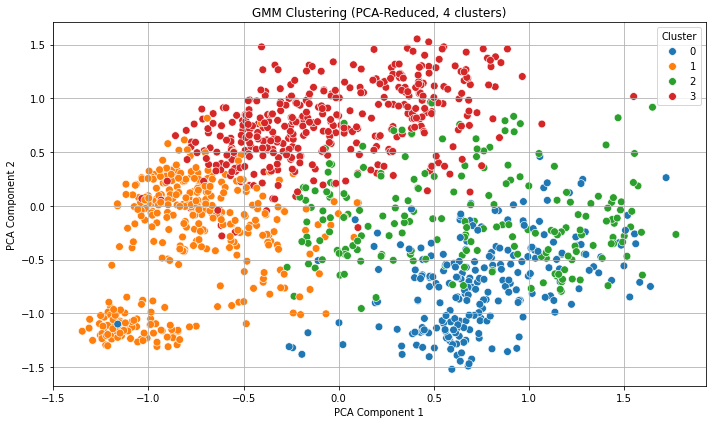

In [207]:
from sklearn.mixture import GaussianMixture

# Apply GMM with a chosen number of clusters (e.g., 3)
n_clusters = 4  # You can change this
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

# Attach cluster labels to original dataframe
df["GMM_Cluster"] = gmm_labels

# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = gmm_labels

# Plot GMM clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=60)
plt.title(f"GMM Clustering (PCA-Reduced, {n_clusters} clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

